DAT405 Assignment 3

Theodor Jendle - 9901134339 - 

Carl Hjalmarsson - 9305198930 - 

In [10]:
import nbdime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

Fixa det som är nedanför denna print i koden om du känner att det behövs, jag tror inte det


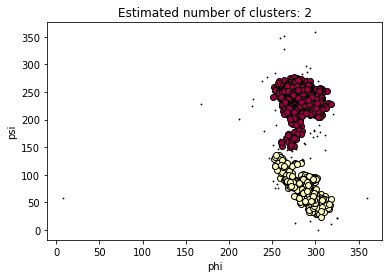

In [11]:
protein_data = pd.read_csv("assignment3-data.csv", index_col = False)
angle_data = protein_data[['residue', 'phi', 'psi']]
pro_data = angle_data[angle_data["residue"] == "PRO"]
shifted_pro = pro_data.copy()
shifted_pro["phi"] = (shifted_pro["phi"] + 350).mod(360)
shifted_pro["psi"] = (shifted_pro["psi"] + 95).mod(360)
shifted_pro.reset_index(drop=True, inplace=True)

# parameters for DBSCAN
epsilon = 10
min_samples = 8
db = DBSCAN(eps = epsilon, min_samples=min_samples).fit(shifted_pro[["phi", "psi"]])

# Code below inspired by module 3 materials which in turn is based on https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
labels = db.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels) 
colors = [plt.cm.Spectral(each) 
          for each in np.linspace(0, 1, len(unique_labels))] 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        col = [0, 0, 0, 1] 
    class_member_mask = (labels == k) 
    phi_psi = shifted_pro[class_member_mask & core_samples_mask] 
    plt.plot(phi_psi["phi"], phi_psi["psi"], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=6) 
    phi_psi = shifted_pro[class_member_mask & ~core_samples_mask] 
    plt.plot(phi_psi["phi"], phi_psi["psi"], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=0.8) 
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel("phi")
plt.ylabel("psi") 
plt.show()

### a)
As shown in the figure above we can see that the amino acid PRO is restricted to the two original clusters. The PRO amino acid angles resides between the phi values 230 degress to 330 degrees and psi values 20 degrees and 280 degrees, approximately. Furthermore we notice that the phi degree is alot more restrictive than the psi degree, spann differences of approximately 160 degrees. We can conclude that this fairly common amino acid does not contribute to the formation of the last original cluster, which in the figure should be to the left.

Fixa det som är nedanför denna print i koden om du känner att det behövs, jag tror inte det


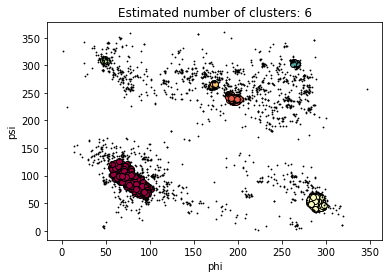

In [12]:
pro_data = angle_data[angle_data["residue"] == "GLY"]
shifted_gly = pro_data.copy()
shifted_gly["phi"] = (shifted_gly["phi"] + 350).mod(360)
shifted_gly["psi"] = (shifted_gly["psi"] + 95).mod(360)
shifted_gly.reset_index(drop=True, inplace=True)

# parameters for DBSCAN
epsilon = 10
min_samples = 40
db = DBSCAN(eps = epsilon, min_samples=min_samples).fit(shifted_gly[["phi", "psi"]])

# Code below inspired by module 3 materials which in turn is based on https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
labels = db.labels_
core_samples_mask = np.zeros_like(labels, dtype=bool) 
core_samples_mask[db.core_sample_indices_] = True 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels) 
colors = [plt.cm.Spectral(each) 
          for each in np.linspace(0, 1, len(unique_labels))] 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        col = [0, 0, 0, 1] 
    class_member_mask = (labels == k) 
    phi_psi = shifted_gly[class_member_mask & core_samples_mask] 
    plt.plot(phi_psi["phi"], phi_psi["psi"], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=6) 
    phi_psi = shifted_gly[class_member_mask & ~core_samples_mask] 
    plt.plot(phi_psi["phi"], phi_psi["psi"], 'o', markerfacecolor=tuple(col), 
             markeredgecolor='k', markersize=0.8) 
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel("phi")
plt.ylabel("psi") 
plt.show()

### b)
This amino acid is a big contributer to what we earlier assumed to be outliers, this can be shown by the sheer amount of points which resides in the upper-left corner. Furthermore we notice that GLY, which also is a relatively common amino acid, is the biggest contributer to the original cluster which can be found between the degrees 25-100 and 55-155 for phi and psi respectively. Furthermore we notice that GLY allows many different combinations of angles which is the result for the great variance in the figure.  